<a href="https://colab.research.google.com/github/HenryBass/nn-experiments/blob/main/spacefillingcurve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

import math

from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LeakyReLU

In [12]:
train = tf.random.uniform(shape=(1000,2),maxval=1,minval=0)
test = tf.random.uniform(shape=(1000,2),maxval=1,minval=0)

print(train.shape, test.shape)

(1000, 2) (1000, 2)


In [42]:
latent_dim = 32

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()

    self.latent_dim = latent_dim

    self.encoder = tf.keras.Sequential([
      layers.Dense(latent_dim/2, activation=LeakyReLU())
    ])

    self.i1 = tf.keras.Sequential([
      layers.Dense(latent_dim, activation=LeakyReLU())
    ])

    self.i2 = tf.keras.Sequential([
      layers.Dense(latent_dim/2, activation=LeakyReLU())
    ])

    self.i3 = tf.keras.Sequential([
      layers.Dense(1, activation=LeakyReLU())
    ])

    self.o1 = tf.keras.Sequential([
      layers.Dense(latent_dim/2, activation=LeakyReLU())
    ])

    self.o2 = tf.keras.Sequential([
      layers.Dense(latent_dim, activation=LeakyReLU())
    ])

    self.o3 = tf.keras.Sequential([
      layers.Dense(latent_dim/2, activation=LeakyReLU())
    ])

    self.decoder = tf.keras.Sequential([
      layers.Dense(2, activation=LeakyReLU())
    ])

  def call(self, x):
    return self.extract(self.embed(x))

  def embed(self, x):
    return self.i3(self.i2(self.i1((self.encoder(x)))))

  def extract(self, x):
    return self.decoder(self.o3(self.o2(self.o1(x))))

def dist(pred, gt):
  return ((pred[0]-gt[0])**2 + (pred[1]-gt[1])**2)**0.5

autoencoder = Autoencoder(latent_dim)

autoencoder.compile(optimizer='adam', loss=tf.keras.losses.mean_squared_error)

Epoch 1/500
32/32 [==============================] - 1s 20ms/step - loss: 0.0245 - val_loss: 0.0216
Epoch 2/500
32/32 [==============================] - 1s 18ms/step - loss: 0.0187 - val_loss: 0.0150
Epoch 3/500
32/32 [==============================] - 1s 27ms/step - loss: 0.0154 - val_loss: 0.0151
Epoch 4/500
32/32 [==============================] - 1s 28ms/step - loss: 0.0141 - val_loss: 0.0139
Epoch 5/500
32/32 [==============================] - 1s 16ms/step - loss: 0.0116 - val_loss: 0.0103
Epoch 6/500
32/32 [==============================] - 1s 19ms/step - loss: 0.0103 - val_loss: 0.0095
Epoch 7/500
32/32 [==============================] - 1s 17ms/step - loss: 0.0094 - val_loss: 0.0091
Epoch 8/500
32/32 [==============================] - 1s 19ms/step - loss: 0.0111 - val_loss: 0.0109
Epoch 9/500
32/32 [==============================] - 1s 18ms/step - loss: 0.0115 - val_loss: 0.0118
Epoch 10/500
32/32 [==============================] - 1s 18ms/step - loss: 0.0124 - val_loss: 0.0131

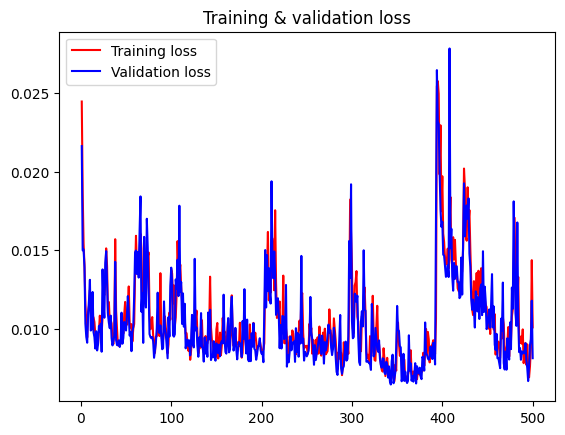

In [47]:
history = autoencoder.fit(train, train,
                epochs=500,
                shuffle=True,
                validation_data=(train, train))

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)


plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training & validation loss')
plt.legend()
plt.show()


In [48]:
e = autoencoder.embed(train)
o = autoencoder.extract(e)
list_e = e.numpy().tolist()
ma = max(list_e)
mi = min(list_e)
print(train, o)
print(mi, ma)

tf.Tensor(
[[0.36389005 0.75643206]
 [0.95145905 0.38774836]
 [0.48923814 0.15812874]
 ...
 [0.5715449  0.15370357]
 [0.70142055 0.6556121 ]
 [0.42758512 0.80101   ]], shape=(1000, 2), dtype=float32) tf.Tensor(
[[0.3833876  0.8054936 ]
 [0.7196983  0.36339423]
 [0.39956015 0.15296547]
 ...
 [0.8292446  0.493269  ]
 [0.84913635 0.7836242 ]
 [0.4506148  0.7990725 ]], shape=(1000, 2), dtype=float32)
[-5.299339294433594] [8.8240385055542]


[0.030379921197891235, 0.03239801526069641, 0.0344146192073822, 0.036431461572647095, 0.03844854235649109, 0.04046502709388733, 0.042481929063797, 0.044498711824417114, 0.04651549458503723, 0.048532575368881226, 0.05054923892021179, 0.05256655812263489, 0.054583340883255005, 0.056600719690322876, 0.05861756205558777, 0.06063452363014221, 0.06265220046043396, 0.06466946005821228, 0.06668666005134583, 0.0687042772769928, 0.07072153687477112, 0.07273873686790466, 0.07475659251213074, 0.07677391171455383, 0.07879140973091125, 0.08080872893333435, 0.08282628655433655, 0.08484432101249695, 0.08686235547065735, 0.08888086676597595, 0.09090003371238708, 0.09291931986808777, 0.09493914246559143, 0.0969603955745697, 0.0989813506603241, 0.10100308060646057, 0.10302433371543884, 0.10504582524299622, 0.10706791281700134, 0.10908952355384827, 0.11111190915107727, 0.11313381791114807, 0.11515602469444275, 0.11717894673347473, 0.11920216679573059, 0.1212252676486969, 0.12324842810630798, 0.12527158856

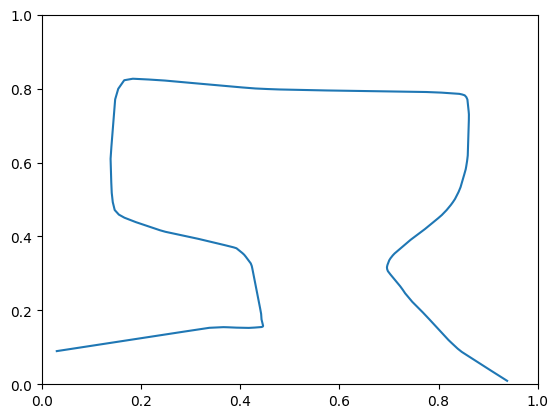

In [49]:
points_x = []
points_y = []
r = 50
for i in range(round(r*(mi[0])), round(r*(ma[0]))):
  p = (autoencoder.extract(tf.reshape(tf.constant([i/r]), (1, 1)))).numpy().tolist()
  points_x += [p[0][0]]
  points_y += [p[0][1]]
print(points_x, points_y)

plt.plot(points_x, points_y)
ax = plt.gca()
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
plt.show()

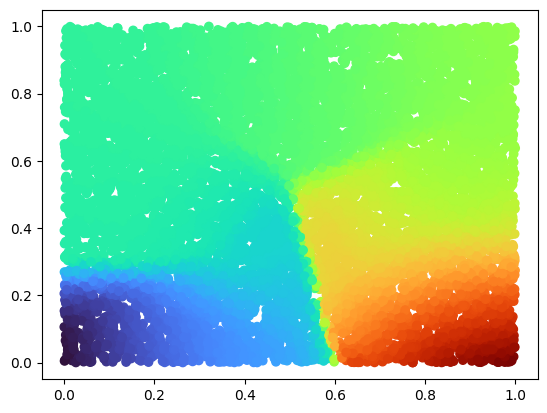

In [50]:
N = 10000
x = np.random.rand(N)
y = np.random.rand(N)

def get_color(x, y):
  out = []
  for i in range(len(x)):
    out += [(autoencoder.embed(tf.reshape(tf.constant([x[i],y[i]]), (1,2)))).numpy().tolist()[0][0]]
  return out
plt.scatter(x, y, c=get_color(x, y), cmap='turbo', alpha=1)

plt.show()